## 6. Gradient Boosting Homework  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
def mse(y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

In [3]:
X, y = load_diabetes(return_X_y=True)

In [125]:
df = pd.read_csv('../datasets/tesla-trending.csv')
df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [126]:
d = pd.to_datetime(df['Date'])
df['Year'] = d.dt.year
df['Month'] = d.dt.month
df['Day'] = d.dt.day
df['DayOfWeek'] = d.dt.weekday

In [65]:
X = np.array(df[['Year', 'Month', 'Day', 'DayOfWeek', 'Open', 'High', 'Low', 'Close']].values.tolist())
y = np.array(df.Volume.tolist())

In [66]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [67]:
for i in range(len(X)):
    X[i] = calc_std_feat(X[i])

In [68]:
X

array([[ 2.64550921, -0.39514683, -0.36024908, ..., -0.36631826,
        -0.37763727, -0.36800245],
       [ 2.6454507 , -0.39948439, -0.3630181 , ..., -0.36237994,
        -0.37319828, -0.37239298],
       [ 2.64548572, -0.38986574, -0.39895816, ..., -0.36119432,
        -0.36975635, -0.36719532],
       ...,
       [ 2.33838112, -0.92778034, -0.88086668, ...,  0.12353865,
         0.07034825,  0.10724827],
       [ 2.3304443 , -0.93479081, -0.8862732 , ...,  0.11965857,
         0.08653725,  0.11572865],
       [ 2.22978433, -0.97808959, -0.97649996, ...,  0.26840313,
         0.08937897,  0.25864278]])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Task 1

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [70]:
class GradientBoostingRegressor:
    def __init__(self, *args, n_trees=100, eta=0.01, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
        self.n_trees = n_trees
        self.eta = eta
        self.alg = None
        
        self.train_errors = None
        self.test_errors = None
        
        
    def fit(self, X_train, y_train, X_test, y_test):
        X_train = pd.DataFrame(X_train)
        y_train = pd.Series(y_train)
        
        self.forest = []

        self.train_errors = []
        self.test_errors = []

        for i in range(self.n_trees):
            alg = DecisionTreeRegressor(*self.args, **self.kwargs)

            if len(self.forest) == 0:
                alg.fit(X_train, y_train)

            else:
                prediction = self.predict(X_train)
                alg.fit(X_train, self.bias(y_train, prediction))
                
            self.forest.append(alg)
            
            self.train_errors.append(mse(y_train, self.predict(X_train)))
            self.test_errors.append(mse(y_test, self.predict(X_test)))
    
    def predict(self, X):
        return np.sum([self.eta * alg.predict(X) for alg in self.forest], axis=0)
   
    @staticmethod
    def bias(y, z):
        return (y - z)

In [74]:
max_depths = [i for i in range(1, 10)]

trees_count = [1, 3, 10, 50, 100, 300]

eta=0.1

md_errors = []

for md in max_depths:
    nt = 300
    
    model = GradientBoostingRegressor(n_trees=nt, eta=eta, max_depth=md, random_state=0)
    model.fit(X_train, y_train, X_test, y_test)
    
    md_errors.append(model.test_errors)
    
    print(f'max_depth: {md} n_trees: {nt} test: {model.test_errors[-1]} train: {model.train_errors[-1]}')

max_depth: 1 n_trees: 300 test: 14345129485004.363 train: 12175745006925.373
max_depth: 2 n_trees: 300 test: 11935898328200.12 train: 4718941733374.258
max_depth: 3 n_trees: 300 test: 11876325952589.014 train: 2186194552775.791
max_depth: 4 n_trees: 300 test: 11093789544935.273 train: 934560963659.8383
max_depth: 5 n_trees: 300 test: 11445099547817.918 train: 402818540633.5081
max_depth: 6 n_trees: 300 test: 12060616467958.9 train: 160966997733.69278
max_depth: 7 n_trees: 300 test: 12101513006011.531 train: 58788713761.8005
max_depth: 8 n_trees: 300 test: 11511376866804.322 train: 19099413196.004395
max_depth: 9 n_trees: 300 test: 12133107992185.904 train: 5319125617.466691


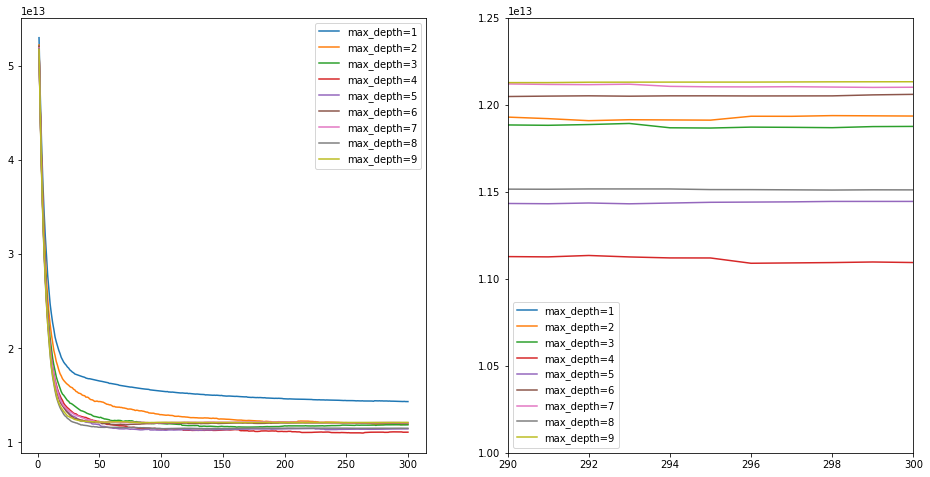

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

for i, e in enumerate(md_errors, 1):
    a = np.arange(1, len(e) + 1)
    ax[0].plot(a, np.array(e), label=f'max_depth={i}')
    
    ax[1].plot(a, np.array(e), label=f'max_depth={i}')
    
    ax[1].set_xlim(290, 300)
    ax[1].set_ylim(1e13, 1.25e13)
    
ax[1].legend()
ax[0].legend()

plt.show()

Лучший результат модель показала при параметре максимальной глубины дерева равной 4, худший - при построении пней.

In [121]:
nt_errors = []

for nt in trees_count:
    md = 4
    
    model = GradientBoostingRegressor(n_trees=nt, eta=eta, max_depth=md, random_state=0)
    model.fit(X_train, y_train, X_test, y_test)
    
    nt_errors.append(model.test_errors)
    
    print(f'max_depth: {md} n_trees: {nt} test: {model.test_errors[-1]} train: {model.train_errors[-1]}')

max_depth: 4 n_trees: 1 test: 51949552934276.55 train: 46438276251209.88
max_depth: 4 n_trees: 3 test: 39485818395415.39 train: 34713777424582.59
max_depth: 4 n_trees: 10 test: 20191172452402.184 train: 16854223424311.37
max_depth: 4 n_trees: 50 test: 12233426362510.719 train: 5802882038614.186
max_depth: 4 n_trees: 100 test: 11445667413124.828 train: 3583967242167.575
max_depth: 4 n_trees: 300 test: 11105406611977.732 train: 934560963659.8383


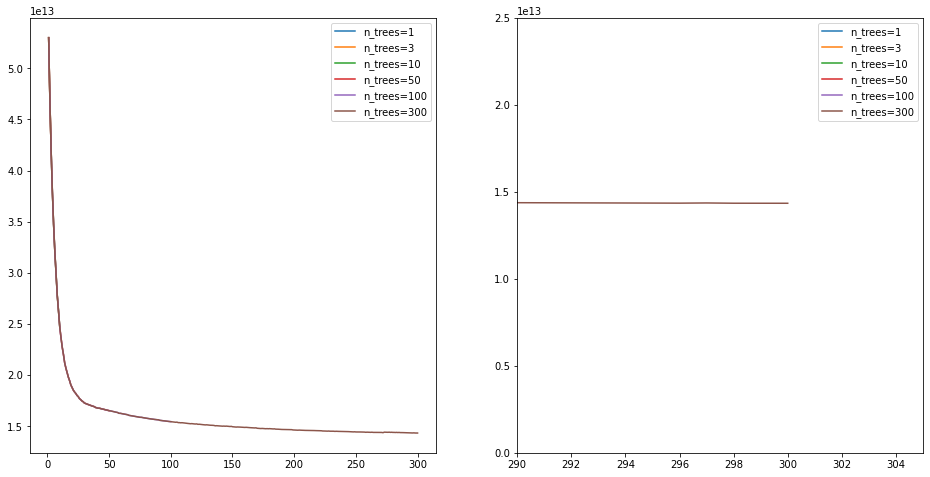

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))

for i, e in enumerate(nt_errors, 1):
    a = np.arange(1, len(e) + 1)
    ax[0].plot(a, np.array(e), label=f'n_trees={trees_count[i - 1]}')
    
    ax[1].plot(a, np.array(e), label=f'n_trees={trees_count[i - 1]}')
    
    ax[1].set_xlim(290, 305)
    ax[1].set_ylim(0, 2.5e13)
    
ax[1].legend()
ax[0].legend()

plt.show()

Никаких изменений с увеличением числа деревьев.

### Task 2

Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5.
Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [100]:
class GradientBoostingRegressor:
    def __init__(self, *args, n_trees=100, eta=0.01, sample=1, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
        self.n_trees = n_trees
        self.eta = eta
        self.sample = sample
        self.alg = None
        
        self.train_errors = None
        self.test_errors = None
        
        
    def fit(self, X_train, y_train, X_test, y_test):
        X_train = pd.DataFrame(X_train)
        y_train = pd.Series(y_train)
        
        self.forest = []

        self.train_errors = []
        self.test_errors = []

        for i in range(self.n_trees):
            alg = DecisionTreeRegressor(*self.args, **self.kwargs)
            
            sample_size = int(X_train.shape[0] * self.sample)
            indexes = np.random.choice(X_train.index, sample_size, replace=False)

            if len(self.forest) == 0:
                alg.fit(X_train.loc[indexes], y_train.loc[indexes])

            else:
                prediction = self.predict(X_train.loc[indexes])
                alg.fit(X_train.loc[indexes], self.bias(y_train.loc[indexes], prediction))
                
            self.forest.append(alg)
            
            self.train_errors.append(mse(y_train, self.predict(X_train)))
            self.test_errors.append(mse(y_test, self.predict(X_test)))
    
    def predict(self, X):
        return np.sum([self.eta * alg.predict(X) for alg in self.forest], axis=0)
   
    @staticmethod
    def bias(y, z):
        return (y - z)

In [128]:
stoh_model = GradientBoostingRegressor(n_trees=300, sample=0.5, max_depth=4, random_state=42)
stoh_model.fit(X_train, y_train, X_test, y_test)

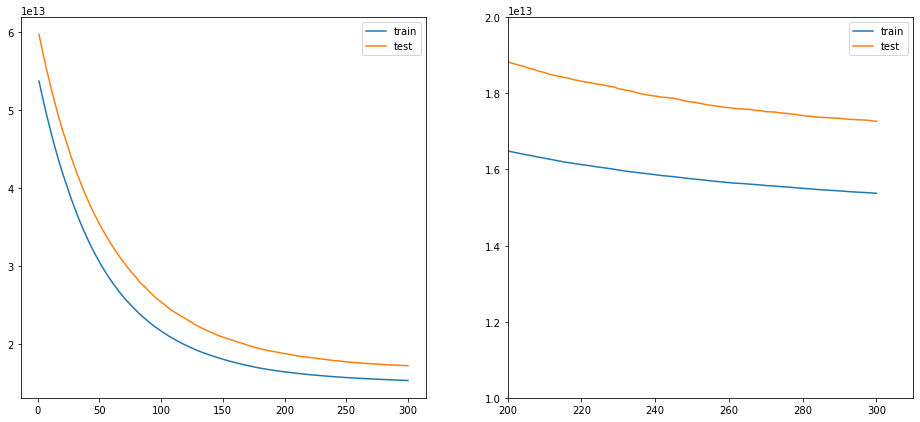

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

train_errs = stoh_model.train_errors
test_errs = stoh_model.test_errors

x = len(train_errs) + 1

ax[0].plot(np.arange(1, x), train_errs, label='train')
ax[0].plot(np.arange(1, x), test_errs,  label='test')
ax[0].legend();

ax[1].plot(np.arange(1, x), train_errs, label='train')
ax[1].plot(np.arange(1, x), test_errs,  label='test')
ax[1].set_xlim(200, 310)
ax[1].set_ylim(1e13, 2e13);
ax[1].legend();

Наблюдается стабильное переобучение - ошибка на тестовой выборке всегда больше, чем на обучающей.